In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import output
output.enable_custom_widget_manager()

Mounted at /content/drive


In [55]:
import os

ROOT_DIR   = '' # fill in your own filepath
MODELS_DIR = os.path.join(ROOT_DIR, 'models')

%cd $ROOT_DIR

from general_utils import *
from file_utils import *
from train_plot_save import *

/root


## Augment letter images and collect results in batches.

In [ ]:
total_number_images = 20000 #I've used 2400 for testing that the code runs, 20000 for actual training
image_size = 112
batch_size = 256

L1, L2 = 'Z', 'E' # whichever two letters you want
letters = L1 + L2

for letter in letters:
    add_augmented_data(letter,
                       total_number=total_number_images, 
                       img_size = image_size, 
                       delete_existing=True)

L1_batches = get_batches(L1, total_number_images, image_size, batch_size)
L2_batches = get_batches(L2, total_number_images, image_size, batch_size)

## Train the model and observe for each epoch.
#### This will attempt to draw L1 and (upside-down) L2 simultaneously.

##### Notes:
`val(number, margin)`:
- If `margin == 0` or `margin == None`, return `number`.
- If `margin` is a numerical value other than 0, returns a random value within`(number-margin, number+margin)`, restricting the values to between 0 and 1.

`D1_path`, `D2_path`, and `G_path`:
- If `None`, trains a new model from epoch 0 onward.
- If set to a filepath, continues training on existing model located at specified location.
- Use `letters`, `model_number`, and `starting_epoch` to specify which existing model/epoch to use as a starting point. If `starting_epoch` is lower than the total number of epochs on which the model was trained, it will branch off into a separate model at that epoch.

`test_compile`:
- If `False`, will train with specified parameters.
- If `True`, will train on a single epoch with a small amount of data to determine whether the code is running properly.


In [ ]:
# Values needed if specifying paths to pre-trained models:
# model_number = _
# starting_epoch = _
model_path = lambda ltrs, model_no, start_e, net_type: \
             os.path.join(MODELS_DIR, f'{ltrs}/{ltrs}_{model_no}/epoch_{start_e}/models/net{net_type}_epoch_{start_e}.pt')



# arbitrary hyperparameters -- experiment to find the best ones
train_ambigram_DDGAN(L1_batches, 
                        L2_batches, 
                        letters, 
                        lr_D = 0.0003,
                        lr_G = 0.0006,
                        weights_dec_D = 0.5,
                        weights_dec_G = 0.5,
                        betas_D = (0.497, 0.6265),
                        betas_G = (0.2645, 0.51),
                        activation_D = Sigmoid,
                        activation_G = Sigmoid,
                        node_factor = 32,
                        D1_path = None, # or: model_path(letters, model_number, starting_epoch, 'D1')
                        D2_path = None, # or: model_path(letters, model_number, starting_epoch, 'D2')
                        G_path  = None, # or: model_path(letters, model_number, starting_epoch, 'G')
                        epochs=30, 
                        test_compile = False)

Output hidden; open in https://colab.research.google.com to view.

Generator model loaded from the following location:
/content/drive/MyDrive/2022 files/LETTERS/models/AB/AB_10/epoch_17/models/netG_epoch_17.pt


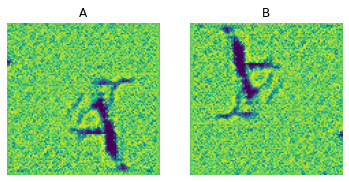

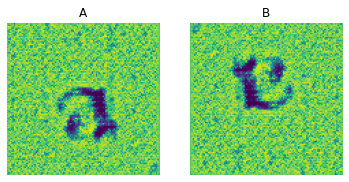

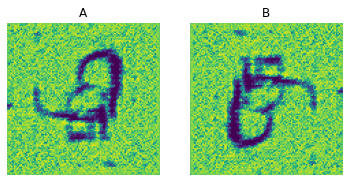

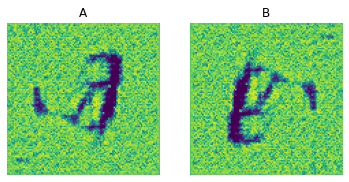

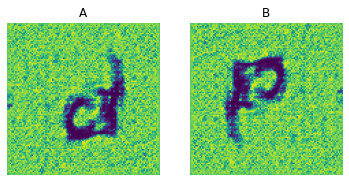

In [ ]:
this_model = 'AB_10'
epoch=17
sample_size=5

generate_sample(this_model, epoch, sample_size)